In [85]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.util import ngrams
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud

## 1. Read a Dataset
Buka file dan ubah ke dalam bentuk dataframe. Tampilkan head dari dataframe tersebut 

In [86]:
filePath = "../assets/buruh_tweets_202112.csv"
df = pd.read_csv(filePath) 
df.head()  

,tweet,userid
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya Tolak Penetapan UMK Banten 2022 hingga Ancam Aksi Besar-besaran https://t.co/sbVetqbNMO",58880688
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapat izin?....makin terang benderang siapa mereka,1330047738541694978
2,Demo Buruh Rentan Ditunggangi Provokator\nhttps://t.co/I4Y5n7gAWN\nAyo Disiplin Prokes,1213739491384426497
3,"@geloraco buruh, PP juga kemarin demo gak ada tuh pasal2an.. yg ada polisi yg jadi pasien... \ndi bali juga simpatisan OPM asoy aja sampe tawuran malah.. sila ke 5 diumpetin kemana..?",930191748688592896
4,Berikanlah kepada buruh upahnya sebelum kering keringatnya. (HR. Abu Yu'la),62988958


In [87]:
pd.set_option('display.max_colwidth', None)

class TweetAnalyzer:
  
  def __init__(self, df):
    self.df = df.copy()
    self.blackList = stopwords.words('indonesian')
    self.cleanTweet()

  def cleanTweet(self):
    # 1. case folding
    # 2. removeSlang
    # 3. removeStopWords
    # 4. stemming
    # although stemming do not named explicitly on instruction, 
    # I do it to get a better result
     
    slangs = ( 
      "yg", "aja","deh", 
      "ga","ngga", "gak",
      "nggak", "ya", "tdk", 
      "dgn", "utk", "nya", 
      "jg", "pd", "krn"
    ) 
    self.df["clean_tweet"] = self.df["tweet"].apply(self.caseFolding)
    self.df["clean_tweet"] = self.df["clean_tweet"].apply(self.removeSlang, slangs=slangs)
    self.df["clean_tweet"] = self.df["clean_tweet"].apply(self.removeStopWords)   
    self.df["clean_tweet"] = self.df["clean_tweet"].apply(self.stemming) 

  def showHead(
    self,
    columns=["tweet", "userid", "clean_tweet"],
    n=5
  ):
    display(self.df[columns].head(n)) 

  def caseFolding(self, text):
    # 1. convert to lower case
    # 2. remove white space
    # 3. remove digit & link
    # 4. remove punctuation
    text = text.lower().strip()
    text = re.sub(r"\d+|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text)
    text = text.translate(text.maketrans("", "", string.punctuation))
    return text
  
  def removeSlang(self, text, slangs):
    # i'd love to combined it with remove_StopWords into one method 
    # but just in case of make an additional slang removal, 
    # so i create it separately
    text = word_tokenize(text)
    cleanText = [word for word in text if word not in slangs]
    return " ".join(cleanText)

  def removeStopWords(self, text):
    text = word_tokenize(text)
    cleanText = [word for word in text if word not in self.blackList]
    return " ".join(cleanText) 

  def stemming(self, text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

  def showFqCharPerTweet(self):
    self.df["clean_tweet"].str.len().hist(bins=20)
    plt.show()

  def showNumWordPerTweet(self):
    self.df["clean_tweet"].str.split().map(lambda x: len(x)).hist(bins=20)
    plt.show()
  
  def getAvgWord(self, x):
      x = x.split()
      x = map(lambda x: len(x), x)
      return(np.average(list(x)))

  def showAvgWordPerTweet(self):
    self.df["clean_tweet"].apply(self.getAvgWord).hist(bins=20)
  
  def freqWordDist(self, nWord=20):
    self.df["tokenize"] = self.df["clean_tweet"].apply(lambda x: word_tokenize(x)) 
    self.allWord = [word for tweet in self.df["tokenize"] for word in tweet]
    fqdist = FreqDist(self.allWord)
    fqdist.plot(nWord, cumulative=False)

  def nGramsDist(self, n=2, nWord=20):
    self.allWord = [word for tweet in self.df["tokenize"] for word in tweet]
    result = pd.Series(ngrams(self.allWord, n)).value_counts()[:nWord]
    print(result)

  def genWordCloud(self):
    wordcloud = WordCloud(
      width=1000, 
      height=800,
      random_state=1,
      background_color='salmon',
      colormap='Pastel1', 
      collocations=False  
    ).generate(" ".join(self.allWord))
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off")
    


## 2. Dataset Preprocessing
Lakukan Preprocessing pada dataset. Simpan kedalam kolom baru dengan nama clean_tweet. Lakukan langkah berikut
* Case folding
* Menghilangkan stopwords
* Menghilangkan bahasa slang


In [88]:
analyze = TweetAnalyzer(df)

## 3. Cleaned Dataset 
Tampilkan head dataframe terbaru

In [89]:
analyze.showHead()

,tweet,userid,clean_tweet
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya Tolak Penetapan UMK Banten 2022 hingga Ancam Aksi Besar-besaran https://t.co/sbVetqbNMO",58880688,sesuai sepakat buruh tangerang raya tolak tetap umk banten ancam aksi besarbesaran
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapat izin?....makin terang benderang siapa mereka,1330047738541694978,demo buruh jubel izinmakin terang benderang
2,Demo Buruh Rentan Ditunggangi Provokator\nhttps://t.co/I4Y5n7gAWN\nAyo Disiplin Prokes,1213739491384426497,demo buruh rentan tunggang provokatorayo disiplin prokes
3,"@geloraco buruh, PP juga kemarin demo gak ada tuh pasal2an.. yg ada polisi yg jadi pasien... \ndi bali juga simpatisan OPM asoy aja sampe tawuran malah.. sila ke 5 diumpetin kemana..?",930191748688592896,buruh pp kemarin demo tuh pasal polisi pasien bal simpatisan opm asoy sampe tawur sila diumpetin mana
4,Berikanlah kepada buruh upahnya sebelum kering keringatnya. (HR. Abu Yu'la),62988958,beri buruh upah kering keringat hr abu yula


## 4. Lakukan Text Data Analytic
* Distribusi Frekuensi karakter per tweet
* Distribusi panjang kata per tweet
* Distribusi panjang rata-rata kata per tweet
* Distribusi Kata
* Distribusi bi-gram

### a. Distribusi Frekuensi karakter per tweet

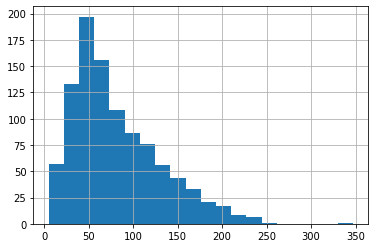

In [90]:
analyze.showFqCharPerTweet()

### Distribusi panjang kata per tweet

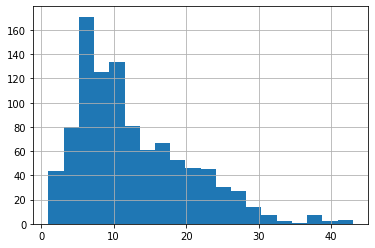

In [91]:
analyze.showNumWordPerTweet()

### Distribusi panjang rata-rata kata per tweet

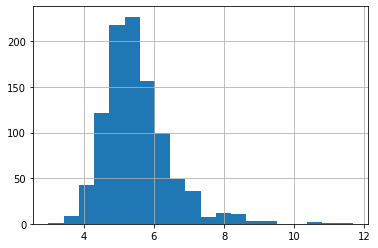

In [92]:
analyze.showAvgWordPerTweet()

### Distribusi Kata

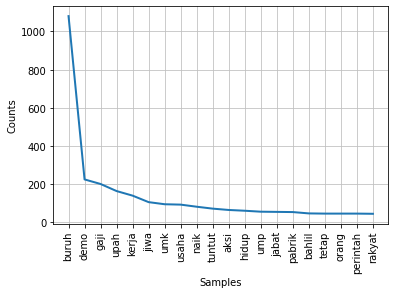

In [93]:
analyze.freqWordDist()

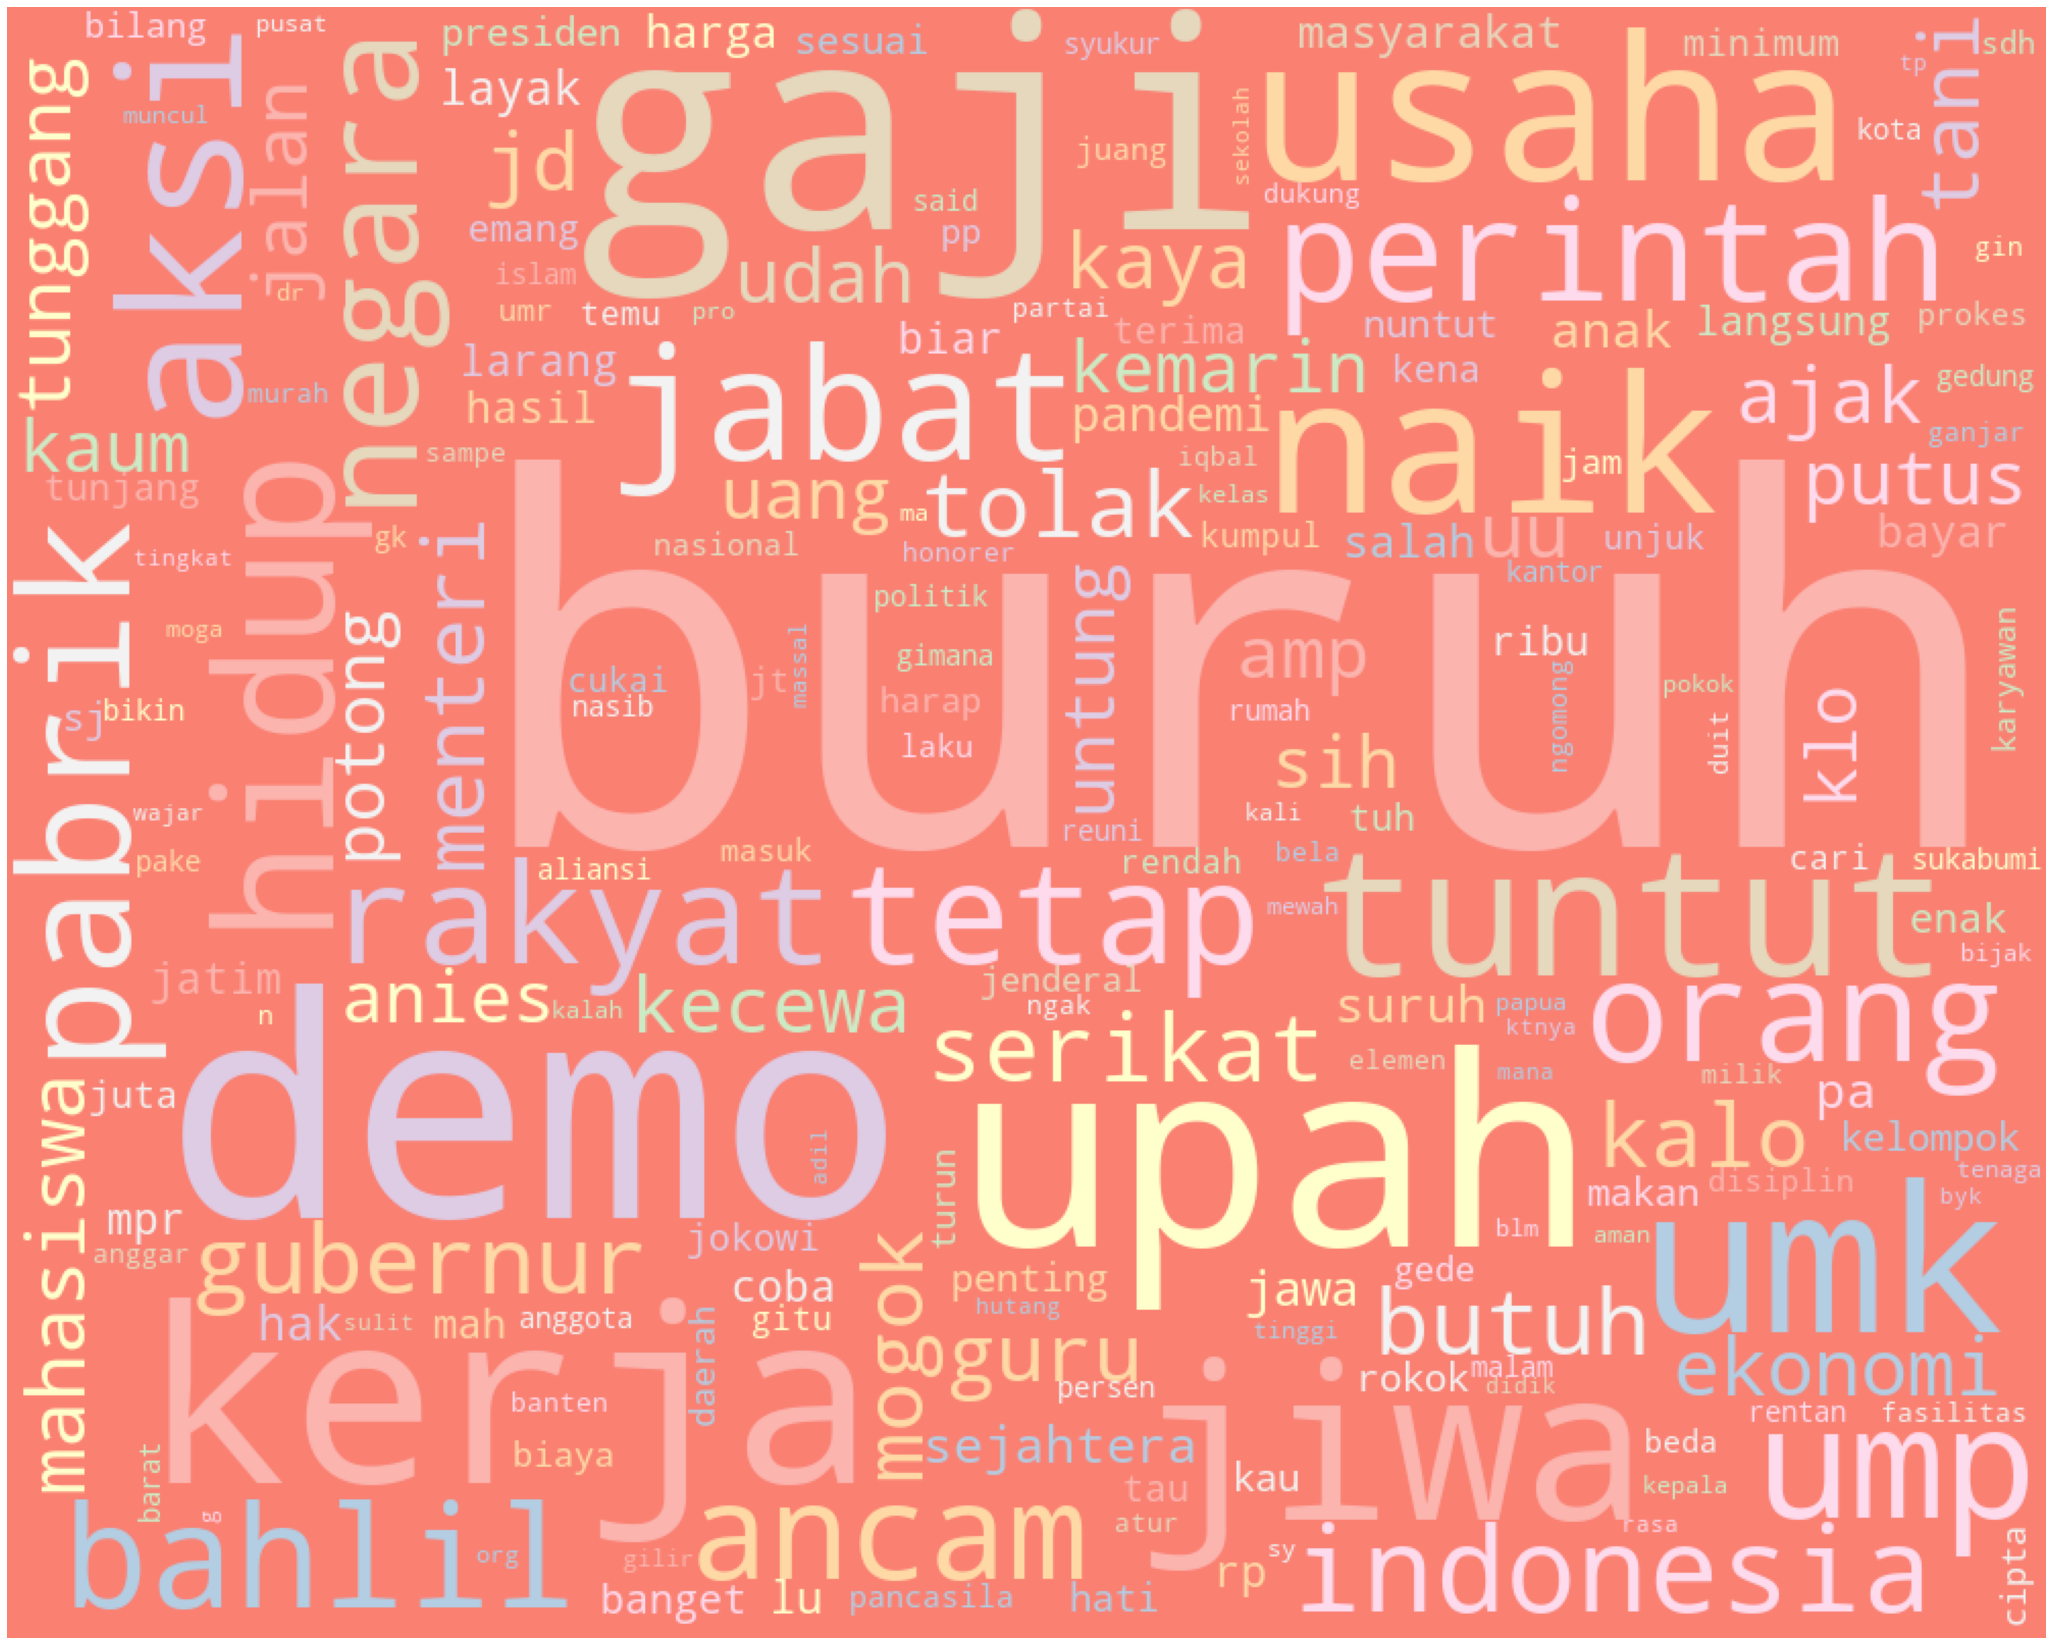

In [94]:
analyze.genWordCloud()

### Distribusi bi-gram

In [95]:
analyze.nGramsDist(n=2)

(demo, buruh)       97
(buruh, demo)       54
(buruh, pabrik)     33
(upah, buruh)       31
(buruh, jiwa)       28
(serikat, buruh)    26
(tuntut, upah)      25
(kaum, buruh)       22
(naik, upah)        21
(gaji, buruh)       21
(buruh, buruh)      19
(jiwa, tuntut)      18
(buruh, tuntut)     17
(mogok, kerja)      17
(upah, minimum)     17
(buruh, tani)       16
(kerja, buruh)      16
(tetap, ump)        15
(cipta, kerja)      15
(aksi, demo)        14
dtype: int64


## 5. Lakukan analisis dan jelaskan temuan kalian.

### a. Distribusi Frekuensi karakter per tweet
- Pada grafik distribusi frekuensi jumlah karaketer per tweet (a), dapat kita lihat bahwa jumlah karakter berada pada kisaran 40-60 karakter per tweet. 
- Meski terdapat jumlah karakter tweet yang lebih dari 150 karakter, tapi jumlahnya (masing-masing) tidak lebih dari 50 tweet.
- Terdapat data pencilan dimana warganet yang melakukan tweet dengan kisaran 350 karakter


### b. Distribusi panjang kata per tweet
- Secara umum, jumlah kata tiap tweet kisaran 8-10 kata per tweet.
- Pola distribusi jumlah kata per data (b) hampir sama dengan distribusi frekuensi jumlah karakter per tweet (a). 


### c. Distribusi panjang rata-rata kata per tweet
- Dari grafik ini kita bisa melihat mayoritas mereka menggunakan sekitar 5 karakter per kata per tweet. Jumlah ini nampaknya sama dengan jumlah karakter pada kata umum di bahasa indonesia.  


### d. Distribusi Kata
- Kata yang mendominasi percakapan warganet dalam twitter adalah "buruh". Kemunculan kata mencapai lebih dari 1000 kali. Jumlah kemunculannya 5 kali lipat dari peringkat ke-2 : demo. Dari sini bisa ditarik kesimpulan sederhana, topik pembicaraan pada dataset twitter ini adalah berkenaan dengan buruh.
- Selanjutnya, untuk mengetahui lebih detail percakapan pada dataset bisa kita perhatikan pada lima peringkat kata dengan frekuensi terbanyak. Berturut-turut kata tersebut adalah "buruh", "demo", "gaji", "upah" dan "kerja". Nampaknya, percakapan warganet mengarah kepada aksi demo buruh yang berkenaan dengan upah atau gaji mereka. Namun disini belum jelas, arahan dari tuntutan dari buruh tersebut. 
- Mari kita ekplorasi kembali dengan melihat lima kata dengan kemunculan terbanyak berikutnya : "jiwa", "usaha", "umk", "naik", dan "tuntut". Saya tidak bisa mengambil kesimpulan dari kata "jiwa" dan "usaha", karena agak sulit dihubungkan dengan kata yang lainnnya. Oleh karena itu mari fokus kepada 3 kata yang lain yakni : "umk", "naik", dan "tuntut". Kata-kata ini menggambarkan lebih detail mengenai tuntutan dari aksi buruh, yakni menuntut kenaikan umk (upah minimum kabupaten/kota). 

- Catatan : setelah saya perhatikan dataset tweet buruh, ternyata "jiwa" merupakan pasangan dari "buruh-jiwa" (dapat dilihat dari bi-gram), merupakan permintaan dari lain untuk meminta buruh agar berjiwa besar dengan apa yang telah diperolehnya selama ini. 


### e. Distribusi bi-gram
- Selanjutnya, kita elaborasi lebih mendalam mengenai hal yang dibicarakan oleh warganet dengan analisis bi-gram. Dengan analisis ini diharapkan kata-kata yang diperoleh memiliki makna lebih. 
- Lima pasangan kata pertama adalah : "demo-buruh", "buruh-demo", "buruh-pabrik", "upah-buruh", dan "buruh-jiwa". Hal ini menguatkan analisis sebelumnya bahwa pembicaraan utama adalah aksi demo yang dilakukan buruh (dalam hal ini mayoritas buruh pabrik) yang menuntut penyesuaian upah mereka. 
- Pada lima pasangan kata berikutnya, diperoleh "serikat-buruh", "tuntut-upah", "kaum-buruh", "gaji-buruh", dan "naik-upah". Dari sini bisa kita peroleh pelaku demo beserta seruan mereka secara lebih detail. Pelaku ini secara umum terdiri atas kaum buruh yang terorganisir dalam serikat buruh. Tuntutan mereka cukup jelas yakni kenaikan upah mereka.
- Baik, mari melangkah kepada sepuluh pasangan kata berikutnya. Ada beberapa pasangan kata yang menarik, yakni selain tuntutan mereka untuk kenaikan upah (dalam hal ini ump), mereka juga sedikit mengancam untuk melakukan aksi mogok kerja. Nampaknya ini akan dilakukan jika tuntutan mereka tidak dipenuhi. Selanjutnya, kita mendapatkan informasi berkenaan dengan lokasi tuntutan buruh (jawa), kemudian kritik mereka terhadap uu cipta kerja, dsb. 
- Terdapat kata-kata yang sepertinya tidak terlalu berhubungan dengan topik utama: buruh tani. Meskipun sama-sama buruh, tapi buruh tani ini nampaknya tidak terlibat dalam aksi tuntutan ini. Saya bisa menyimpulkan demikian karena buruh tani sama sekali tidak terikat dengan upah minimum. 